# Data Cleaning

In [142]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [143]:
data = pd.read_csv('data/owid-co2-data.csv')
df = data
print(df.shape)
df.head()

(24016, 38)


,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,co2_per_unit_energy,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,total_ghg,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.000,0.015,0.000,NaN,NaN,NaN,0.0,0.015,0.0,0.0,0.000,0.0,0.002,0.0,0.0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,NaN,0.001,0.099,0.001,0.004,NaN,NaN,0.0,0.022,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,NaN,0.001,0.191,0.001,0.005,NaN,NaN,0.0,0.026,0.0,0.0,0.066,0.0,0.003,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,0.000,0.000,NaN,NaN,NaN,0.012,NaN,0.001,0.282,0.001,0.004,NaN,NaN,0.0,0.033,0.0,0.0,0.062,0.0,0.004,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,NaN,0.002,0.388,0.001,0.005,NaN,NaN,0.0,0.037,0.0,0.0,0.066,0.0,0.005,0.0,0.0,0.008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


In [144]:
#Only include data from 1950 and later
df = df[df['year']>=1950]

In [145]:
#Drop columns with >8K null values (50% of data)
df.dropna(axis=1,thresh=8000, inplace=True)


In [146]:
#Drop continents, identified by lacking an ISO code
df.dropna(axis=0,subset=['iso_code'],inplace=True)

#Drop "World" entries
df = df[df.country != 'World']
df.shape

(14404, 19)

**plot dotted line after Indonesia**

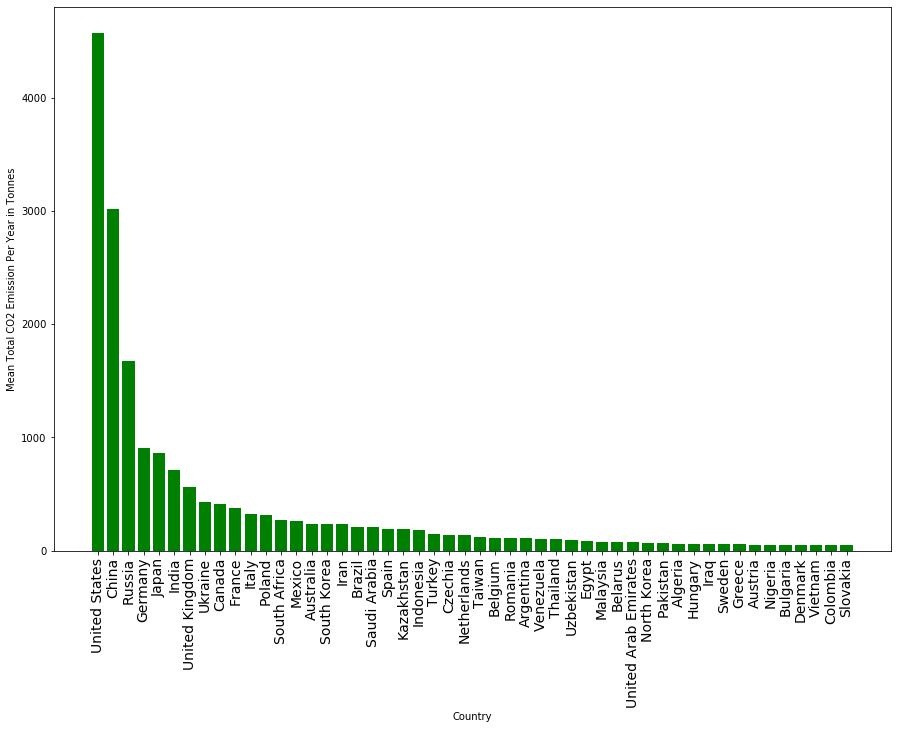

In [147]:
#Visualize top 50 total CO2 emissions by country (note: fix size to make more legible)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,10))
plt.bar(x = df.groupby(['country'])['co2'].mean().sort_values(ascending=False).index[:50],
        height = df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50],
       color = 'green')
plt.xlabel('Country')
plt.ylabel('Mean Total CO2 Emission Per Year in Tonnes')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    # specify integer or one of preset strings, e.g.
    #tick.label.set_fontsize('x-small')
    tick.label.set_rotation('vertical')

In [151]:
# #Look at top 50 total CO2 emission values by country to determine cut-off point
df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:50]

country
United States           4572.443145
China                   3020.410884
Russia                  1678.672633
Germany                  907.555435
Japan                    862.353855
India                    711.136391
United Kingdom           562.317333
Ukraine                  431.599350
Canada                   408.196348
France                   380.734435
Italy                    323.503725
Poland                   315.624159
South Africa             273.030304
Mexico                   263.238609
Australia                239.099464
South Korea              239.019536
Iran                     238.637420
Brazil                   208.254638
Saudi Arabia             207.846739
Spain                    191.898884
Kazakhstan               190.311700
Indonesia                178.857464
Turkey                   143.218507
Czechia                  140.431083
Netherlands              139.889377
Taiwan                   117.495261
Belgium                  111.949609
Romania             

In [149]:
#Create df of top 10 CO2 emmiters per capita, of the top 22 total CO2 emmiters
#Cut off at 22 after Indonesia above due to local dropoff point
top22_co2 = list(df.groupby(['country'])['co2'].mean().sort_values(ascending=False)[:22].index)
df_top22_co2 = df.loc[df['country'].isin(top22_co2)]
top10_percapita = list(df_top22_co2.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False)[:10].index)
print(top10_percapita)


['United States', 'Canada', 'Australia', 'Kazakhstan', 'Russia', 'Germany', 'Saudi Arabia', 'United Kingdom', 'Poland', 'Ukraine']


Text(0, 0.5, 'Mean CO2 Emission Per Year Per Capita in Tonnes')

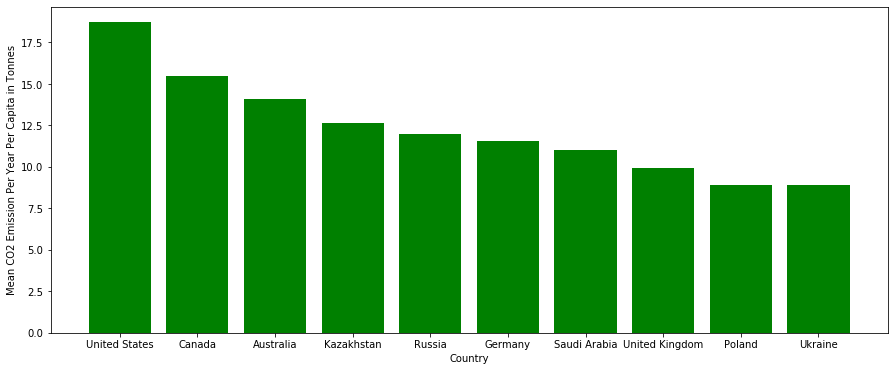

In [150]:
df_top10 = df.loc[df['country'].isin(top10_percapita)]
fig, ax = plt.subplots(figsize=(15,6))
plt.bar(x = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False).index,
        height = df_top10.groupby(['country'])['co2_per_capita'].mean().sort_values(ascending=False),
       color = 'green')
plt.xlabel('Country')
plt.ylabel('Mean CO2 Emission Per Year Per Capita in Tonnes')

# Time Series Model for USA

**EDA for USA**

In [152]:
#Reload original df to get pre-1950 USA data
df_USA = data

#Only include USA co2_per_capita data post-1800 (lacking data before this date)
df_USA = df_USA[df_USA['year'] >= 1800]
df_USA = df_USA[df_USA['country'] == 'United States']
df_USA = df_USA[['year','co2_per_capita']]
df_USA.set_index('year', inplace=True)

print(df_USA.shape)

(219, 1)


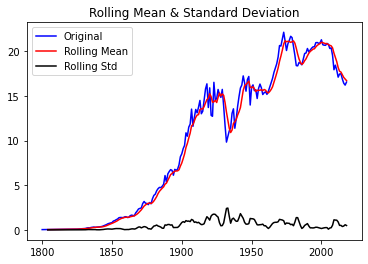

In [12]:
roll_mean = df_USA.rolling(window=5, center=False).mean()
roll_std = df_USA.rolling(window=5, center=False).std()

plt.plot(df_USA,color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

**Differencing**

In [13]:
#get differenced values
diff = df_USA.diff().rename(index=str, columns={"co2_per_capita": "Differenced Observations"})


**Dickey-Fuller Test**

In [155]:
from statsmodels.tsa.stattools import adfuller

test = adfuller(diff['Differenced Observations'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

##NOTE: small p-value (.001) indicates stationarity

Test Statistic                  -4.055314
p-value                          0.001147
#Lags Used                      11.000000
Number of Observations Used    205.000000
dtype: float64

**Checking out ACF/PACF to determine which terms in include**

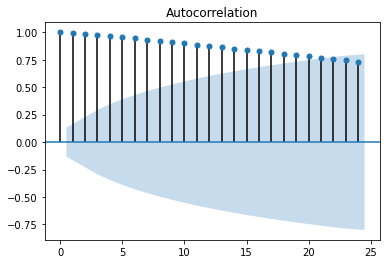

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_USA[:-1], alpha=.05);

##NOTE: data is geometric! (indicates AR)

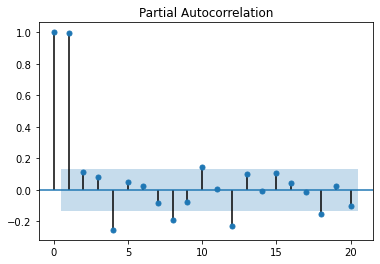

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_USA[:-1], alpha=.05, lags=20);

##NOTE: lag of 1 is significant


REMOVE

(1,2,3): arL1=0.000, maL1=0.002, maL2=0.000, maL3=0.000


insignificant: (1,1,3), (0,1,3), (0,2,3), (0,2,4), (1,2,4), (1,1,4), (0,1,2), (0,1,4), (5,2,3), (5,2,2), (5,1,3)

## Fitting ARIMA Model
Exploring different parameters to find best p-value


In [58]:
from statsmodels.tsa.arima_model import ARIMA

#fit model
mod123 = ARIMA(y_train[:-1], order=(1,2,3)) # p,d,q
mod123_fit = mod123.fit()
print(mod123_fit.summary())
##NOTE: Check out coef and p-value - 

                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  194
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -228.044
Method:                       css-mle   S.D. of innovations              0.772
Date:                Wed, 27 Jan 2021   AIC                            468.089
Time:                        15:03:36   BIC                            487.696
Sample:                             2   HQIC                           476.028
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0005      0.001      0.629      0.530      -0.001       0.002
ar.L1.D2.co2_per_capita    -0.7615      0.103     -7.401      0.000      -0.963      -0.560


In [77]:
#fit model
mod420 = ARIMA(df_USA[:-1], order=(4,2,0)) # p,d,q
mod420_fit = mod420.fit(disp=0)
print(mod420_fit.summary())
##NOTE: Check out coef and p-value - 

                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(4, 2, 0)   Log Likelihood                -264.456
Method:                       css-mle   S.D. of innovations              0.821
Date:                Wed, 27 Jan 2021   AIC                            540.912
Time:                        15:49:19   BIC                            561.164
Sample:                             2   HQIC                           549.094
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0015      0.017     -0.088      0.930      -0.036       0.033
ar.L1.D2.co2_per_capita    -0.9221      0.067    -13.798      0.000      -1.053      -0.791


In [61]:
#fit model
mod520 = ARIMA(df_USA[:-1], order=(5,2,0)) # p,d,q
mod520_fit = mod520.fit(disp=0)
print(mod520_fit.summary())
##NOTE: Check out coef and p-value - 

                             ARIMA Model Results                              
Dep. Variable:      D2.co2_per_capita   No. Observations:                  216
Model:                 ARIMA(5, 2, 0)   Log Likelihood                -260.117
Method:                       css-mle   S.D. of innovations              0.804
Date:                Wed, 27 Jan 2021   AIC                            534.233
Time:                        15:27:14   BIC                            557.860
Sample:                             2   HQIC                           543.778
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0014      0.014     -0.102      0.919      -0.029       0.026
ar.L1.D2.co2_per_capita    -0.9588      0.067    -14.395      0.000      -1.089      -0.828


# Train-Test Split

In [116]:
#Split 90% of data into train

train = df_USA.loc[:1996]
test = df_USA.loc[1997:]

X_train, X_test = train.index , test.index
y_train, y_test = train['co2_per_capita'] , test['co2_per_capita']


In [163]:
pred_123

194    0.087150
195    0.165102
196   -0.183526
197    0.140610
198   -0.106222
199    0.081742
200   -0.061394
201    0.047606
202   -0.035398
203    0.027810
204   -0.020324
205    0.016330
206   -0.011582
207    0.009673
208   -0.006513
209    0.005813
210   -0.003573
211    0.003575
212   -0.001868
213    0.002276
214   -0.000880
215    0.001524
216   -0.000307
217    0.001087
dtype: float64

In [161]:
pred.reindex(range(1997,2018))

1997   NaN
1998   NaN
1999   NaN
2000   NaN
2001   NaN
2002   NaN
2003   NaN
2004   NaN
2005   NaN
2006   NaN
2007   NaN
2008   NaN
2009   NaN
2010   NaN
2011   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
2017   NaN
dtype: float64

In [138]:
y_test

year
1997    20.985
1998    20.895
1999    20.928
2000    21.289
2001    20.730
2002    20.685
2003    20.672
2004    20.884
2005    20.782
2006    20.320
2007    20.385
2008    19.534
2009    17.935
2010    18.446
2011    17.885
2012    17.105
2013    17.455
2014    17.485
2015    16.900
2016    16.428
2017    16.213
2018    16.559
Name: co2_per_capita, dtype: float64

In [137]:
y_train

year
1800     0.037
1801     0.039
1802     0.041
1803     0.041
1804     0.045
         ...  
1992    20.136
1993    20.350
1994    20.497
1995    20.503
1996    20.963
Name: co2_per_capita, Length: 197, dtype: float64

In [117]:
# pred = mod123_fit.predict(start=start, end=end, dynamic=False)

In [132]:
start = len(y_train) -1
end = len(y_train) + len(y_test)

pred_123 = mod123_fit.predict(start=start, end=end, dynamic=False)


**AIC and RMSE**

In [136]:
AIC_123 = mod123_fit.aic
AIC_420 = mod420_fit.aic
AIC_520 = mod520_fit.aic

print(AIC_123)
print(AIC_420)
print(AIC_520)

468.08855671052993
540.9121676189329
534.2330383660093


In [123]:
print(len(y_train))
print(len(y_test))
print(len(pred))

197
22
24


In [121]:
RMSE = np.sqrt(((pred-y_test)**2).mean())
RMSE

nan

**Exploring best model**

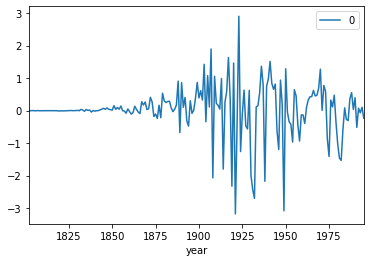

In [62]:
# Visualize residuals/error
residuals_123 = pd.DataFrame(mod123_fit.resid)
residuals_123.plot()
pyplot.show();


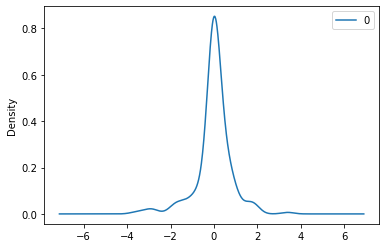

In [53]:
# Check for linearity
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde')
pyplot.show()

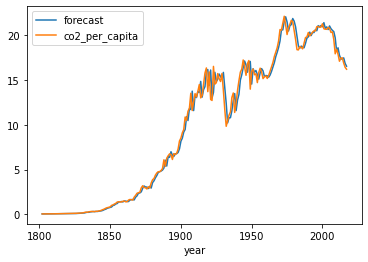

In [67]:
# Visualize prediction
mod123_fit.plot_predict();


In [60]:
model_fit.forecast()[0] # 0 indicates the very next value the model predicts??


array([15.92231091])

# Additional Notes

In [93]:
y_test.diff(1)

year
1997      NaN
1998   -0.090
1999    0.033
2000    0.361
2001   -0.559
2002   -0.045
2003   -0.013
2004    0.212
2005   -0.102
2006   -0.462
2007    0.065
2008   -0.851
2009   -1.599
2010    0.511
2011   -0.561
2012   -0.780
2013    0.350
2014    0.030
2015   -0.585
2016   -0.472
2017   -0.215
2018    0.346
Name: co2_per_capita, dtype: float64

In [ ]:
#choose top 50 countries by co2 emissions (not per capita)
#time series based on co2 emissions (not per capita)
#observe per capita data via visualizations

**Tuesday**

-Initial time series model (check for stationarity/trends, fix if not)--top 10 countries (not per capita)

-Vizualizations for top 10 countries per capita

**Wednesday**

-Fix whatever needs fixing

-Other EDA/visualizations

-Tune final model

**Thursday**

-Tune final model (if not done by Wed)

-Create Read Me, PPT presentation

-Clean up code

-Practice presentation

**Stretch Goals**

-Research peaks and valleys historically

-Compare to world emissions


In [ ]:
for country in top10_percapita:
    